<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/ANN/CC_Convert_sequential_to_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from IPython import display
display.set_matplotlib_formats('svg')
plt.style.use('ggplot')

## Create data

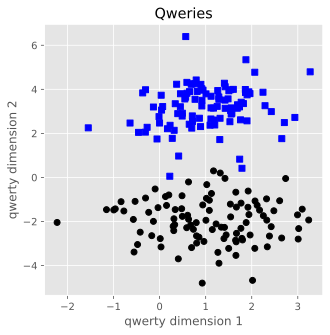

In [3]:
n_per_clust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# generate data
a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]

# true labels
labels_np = np.vstack((np.zeros((n_per_clust,1)), np.ones((n_per_clust, 1))))

# concatanate data into matrix
data_np = np.hstack((a,b)).T

# conver to tensors
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels == 0)[0], 0],data[np.where(labels == 0)[0], 1], 'bs')
plt.plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.title('Qweries')
plt.show()

## Function to build and train the model

In [17]:
class ANNClassify(nn.Module):
  def __init__(self):
    super(ANNClassify, self).__init__()
    self.linear1 = nn.Linear(2,16)
    self.linear2 = nn.Linear(16,1)
    self.linear3 = nn.Linear(1,1)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = torch.sigmoid(self.linear3(x))
    return x

In [18]:
def create_model(learning_rate):
  model = ANNClassify()
  lossfun = nn.BCELoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  return model, lossfun, optimizer

## Function to train the model

In [19]:
def train_model(model, lossfun, optimizer):
  num_epochs = 1000
  losses = torch.zeros(num_epochs)
  
  for epochi in range(num_epochs):
    yHat = model(data)
    loss = lossfun(yHat, labels)
    losses[epochi] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  predictions = model(data)
  total_acc = 100 * torch.mean(((predictions >.5) == labels).float())

  return losses, predictions, total_acc

## Testing once

Final accuracy: 98.00


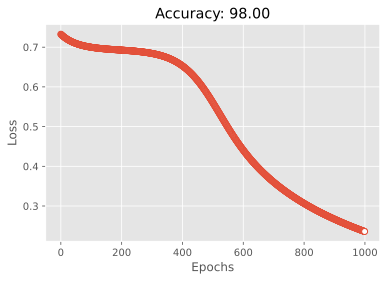

In [20]:
model, lossfun, optimizer = create_model(.01)
losses, predictions, total_acc = train_model(model, lossfun, optimizer)
print(f'Final accuracy: {total_acc:.2f}')

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Accuracy: {total_acc:.2f}')
plt.show()

## Varying learning rates

In [21]:
learning_rates = np.linspace(.001, .1, 50)
num_epochs = 1000
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs))

for i,lr in enumerate(learning_rates):
  model, lossfun, optimizer = create_model(lr)
  losses, predictions, total_acc = train_model(model, lossfun, optimizer)
  acc_by_lr.append(total_acc)
  all_losses[i,:] = losses.detach()

In [22]:
all_losses[:5]

array([[0.66528463, 0.66492635, 0.66456813, ..., 0.37425423, 0.37408334,
        0.37391257],
       [0.67866635, 0.67743653, 0.67620629, ..., 0.29894039, 0.29879338,
        0.29864651],
       [0.75702757, 0.75687647, 0.75672585, ..., 0.69863057, 0.6986168 ,
        0.69860327],
       [0.85462946, 0.85313827, 0.85166466, ..., 0.28534123, 0.28506076,
        0.28478068],
       [0.70367712, 0.70362985, 0.7035827 , ..., 0.69326162, 0.69326103,
        0.69326055]])

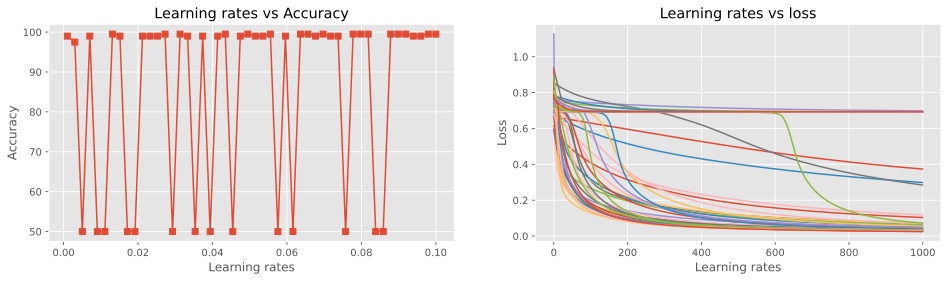

In [23]:
fig,ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(learning_rates, acc_by_lr, 's-')
ax[0].set_xlabel('Learning rates')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Learning rates vs Accuracy')

ax[1].plot(all_losses.T)
ax[1].set_xlabel('Learning rates')
ax[1].set_ylabel('Loss')
ax[1].set_title('Learning rates vs loss')
plt.show()